In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import pathlib
import numpy as np
import matplotlib.pyplot as plt


#get path of this notebook

current_path = pathlib.Path().absolute()
print(current_path)

sys.path.append(str(current_path / '../prepare_data'))
sys.path.append(str(current_path / '../datasets'))
from converter_utils import read_lossless_jpeg_raw


/home/lloprib/proyecto_mam/Mammography/Yolo8Mamo/notebooks


In [6]:
ddsm_dir = pathlib.Path('/home/alalbiol/Data/mamo/cases')

ljpeg_images = list(ddsm_dir.glob('**/*.LJPEG'))

print(ljpeg_images[:10])




[]


## Read one image

In [7]:
from converter_utils import read_lossless_jpeg_raw

In [8]:
img = read_lossless_jpeg_raw(str(ljpeg_images[0]))

print(img.shape)
print(img.dtype)

IndexError: list index out of range

# Convert case

In [6]:
from converter_utils import convert_case_npy
case_folder_in = ljpeg_images[0].parent
case = "/".join(case_folder_in.parts[-3:])

out_folder = "/tmp/ddsm"

case_folder_out = pathlib.Path(out_folder) / case
case_folder_out.mkdir(parents=True, exist_ok=True)

convert_case_npy(case_folder_in,case_folder_out)



print(case)

cancer/cancer_01/case3027


In [7]:
# read npy images in case_folder_out
npy_images = list(case_folder_out.glob('**/*.npy'))
print(npy_images[:10])

npy_images = {p.name: np.load(p) for p in npy_images}
keys = list(npy_images.keys())



[PosixPath('/tmp/ddsm/cancer/cancer_01/case3027/B_3027_1.LEFT_CC.npy'), PosixPath('/tmp/ddsm/cancer/cancer_01/case3027/B_3027_1.LEFT_MLO.npy'), PosixPath('/tmp/ddsm/cancer/cancer_01/case3027/B_3027_1.RIGHT_MLO.npy'), PosixPath('/tmp/ddsm/cancer/cancer_01/case3027/B_3027_1.RIGHT_CC.npy')]


Text(0.5, 1.0, 'B_3027_1')

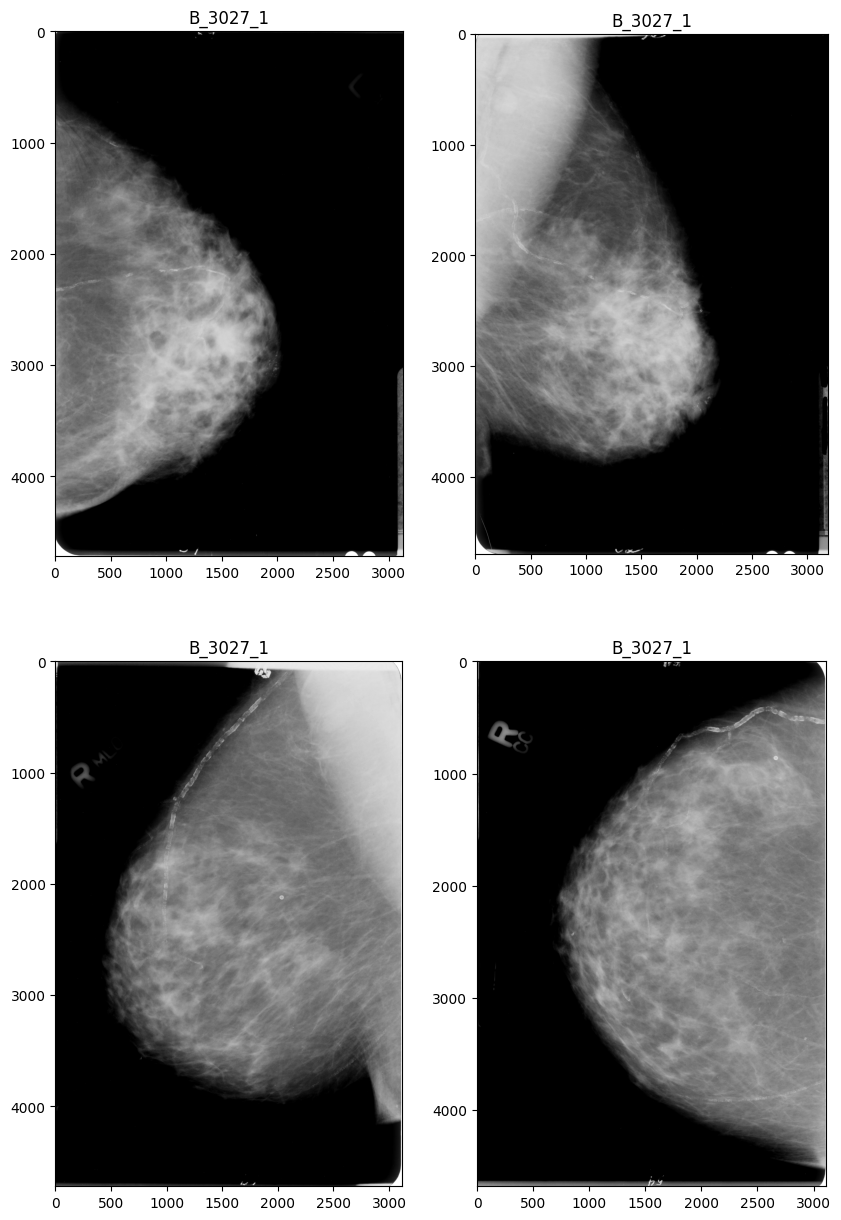

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

for k, im in npy_images.items():
    npy_images[k] = npy_images[k].max() - npy_images[k]

axs[0,0].imshow(npy_images[keys[0]], cmap='gray')
axs[0,0].set_title(keys[0].split('.')[0])
axs[0,1].imshow(npy_images[keys[1]], cmap='gray')
axs[0,1].set_title(keys[1].split('.')[0])
axs[1,0].imshow(npy_images[keys[2]], cmap='gray')
axs[1,0].set_title(keys[2].split('.')[0])
axs[1,1].imshow(npy_images[keys[3]], cmap='gray')
axs[1,1].set_title(keys[3].split('.')[0])

# Read overlays

In [9]:
print(case)

cancer/cancer_01/case3027


In [10]:
# find overlay files for case

overlay_files = list(case_folder_in.glob('**/*.OVERLAY'))
print(overlay_files)



[PosixPath('/home/alalbiol/Data/mamo/cases/cancer/cancer_01/case3027/B_3027_1.LEFT_CC.OVERLAY'), PosixPath('/home/alalbiol/Data/mamo/cases/cancer/cancer_01/case3027/B_3027_1.LEFT_MLO.OVERLAY')]


In [11]:
from annotation_utils import read_overlay, get_outline_curve

print("reading overlay: ", overlay_files[0])
overlay = read_overlay(str(overlay_files[0]))

print(overlay)
#total #abormalities, #oulines in each abnormality, abnormality (see bellow)

reading overlay:  /home/alalbiol/Data/mamo/cases/cancer/cancer_01/case3027/B_3027_1.LEFT_CC.OVERLAY
(2, [1, 1], [('MASS', 4, 4, 'MALIGNANT', [[1792, 2344, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6,

In [12]:
#unzip zip object

abnormalities  = list(overlay[2])



In [13]:
print(len(abnormalities))
#l_type,ass,subt,patho,outlines

abnormalities[0]

2


('MASS',
 4,
 4,
 'MALIGNANT',
 [[1792,
   2344,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   

The DDSM (Digital Database for Screening Mammography) dataset is a widely used resource in the field of medical imaging, specifically for mammography. It contains a variety of mammograms, each annotated with information about lesions, assessments, and subtlety. Here's an explanation of these terms:

1. **Lesion Type:**
   - Lesion type refers to the nature or category of the abnormality present in the mammogram.
   - In mammography, lesions are typically classified as masses or calcifications.
   - Masses are lumps or irregularities that can be indicative of tumors.
   - Calcifications are tiny deposits of calcium that may be associated with certain types of breast cancer.

2. **Assessment:**
   - Assessment in the context of mammography refers to the radiologist's evaluation of the mammogram.
   - It involves determining the likelihood of malignancy or the severity of the detected abnormality.
   - Common assessments include:
     - BI-RADS 0: Incomplete - additional imaging evaluation is needed.
     - BI-RADS 1: Negative.
     - BI-RADS 2: Benign finding.
     - BI-RADS 3: Probably benign - short-term follow-up recommended.
     - BI-RADS 4: Suspicious abnormality - biopsy should be considered.
     - BI-RADS 5: Highly suggestive of malignancy - appropriate action should be taken.

3. **Subtlety:**
   - Subtlety refers to how inconspicuous or difficult to detect a lesion may be in the mammogram.
   - It is a subjective measure that indicates the ease with which a radiologist can identify and diagnose the abnormality.
   - Lesions can be classified on a scale from subtle to obvious based on their visibility in the image.

These annotations in the DDSM dataset provide valuable information for researchers and practitioners working on the development and evaluation of algorithms for computer-aided diagnosis (CAD) systems in mammography. The dataset aims to support advancements in breast cancer detection and diagnosis by providing a diverse set of cases for analysis. Researchers use these annotations to train and test their algorithms, ultimately aiming to improve the accuracy and efficiency of mammogram interpretation for early breast cancer detection.

[1792, 2344, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

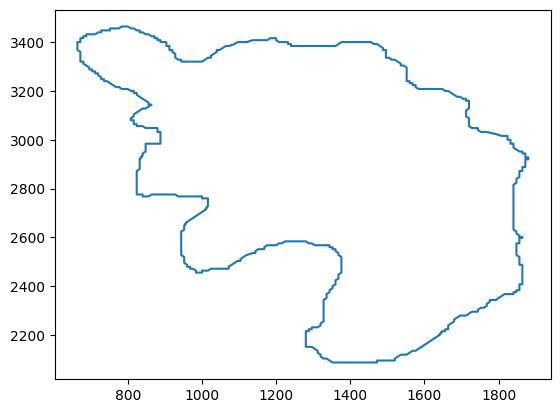

In [14]:
chain_outline = list(abnormalities[0][4][0])
print(chain_outline)

outline = get_outline_curve(chain_outline)

plt.plot(outline[0], outline[1])


In [15]:
# list all .OVERLAY files in ../tmp/cases

folder = pathlib.Path('/home/alalbiol/Programacion/mammography/Yolo8Mamo/tmp')
print(folder)

overlay_files = list(folder.glob('**/*.OVERLAY'))
print("Number of overlay files", len(overlay_files))

/home/alalbiol/Programacion/mammography/Yolo8Mamo/tmp
Number of overlay files 4032


In [16]:
for overlay_file in overlay_files:
    if overlay_file.name[0] == '.':
        continue
    #print("reading ", overlay_file)
    overlay = read_overlay(str(overlay_file))
    #total #abormalities, #oulines in each abnormality, abnormality (see bellow)
    
    if np.array(overlay[1]).max() > 2:
        print("overlay with several outlines:", overlay_file)
        print(overlay[1])
        break
        
    
        
    
    

overlay with several outlines: /home/alalbiol/Programacion/mammography/Yolo8Mamo/tmp/cases/cancers/cancer_09/case3077/B_3077_1.RIGHT_CC.OVERLAY
[4]


In [17]:
abnormalities = overlay[2]

print(abnormalities)

[('CALCIFICATION', 4, 5, 'MALIGNANT', [[2968, 2064, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [18]:
for abn in abnormalities:
    print(abn)

('CALCIFICATION', 4, 5, 'MALIGNANT', [[2968, 2064, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [19]:
from annotation_utils import read_annotation_image
   




# Estadisticas abnormalities

In [27]:
from tqdm import tqdm
all_abnormalities = []

for overlay_file in tqdm(overlay_files):
    if overlay_file.name[0] == '.':
        continue
    
    folder = overlay_file.parts[-4]

    
    #print("reading ", overlay_file)
    abnormalities = read_annotation_image(str(overlay_file))
    
    for abn in abnormalities:
         abn['folder'] = folder
         all_abnormalities.append(abn)  
        
    
      
    
    
    
    

  0%|          | 0/4032 [00:00<?, ?it/s]

100%|██████████| 4032/4032 [00:01<00:00, 3078.01it/s]


<Axes: xlabel='type'>

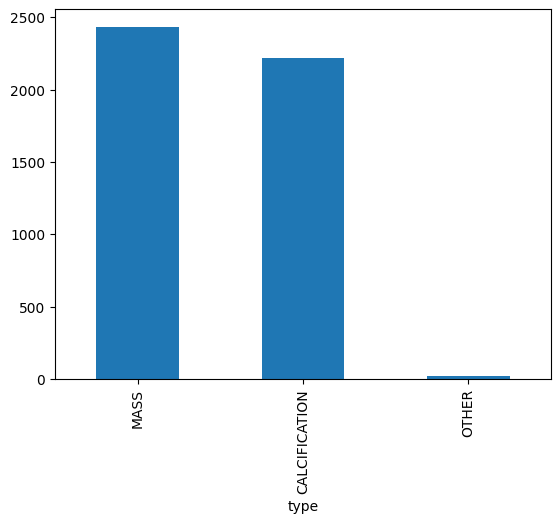

In [28]:
import pandas as pd

all_abnormalities_df = pd.DataFrame(all_abnormalities)
all_abnormalities_df.type.value_counts().plot(kind='bar')

<Axes: xlabel='pathology'>

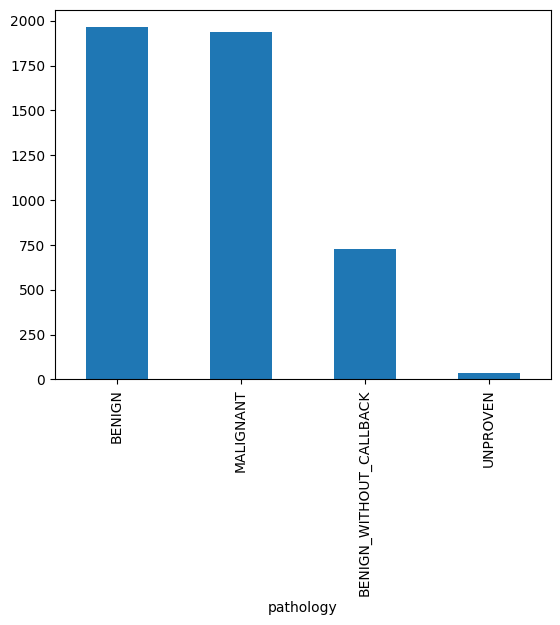

In [29]:
all_abnormalities_df.pathology.value_counts().plot(kind='bar')

In [30]:
# make table of occurrences of each type of abnormality with pathology

pd.crosstab(all_abnormalities_df.folder, all_abnormalities_df.pathology)

pathology,BENIGN,BENIGN_WITHOUT_CALLBACK,MALIGNANT,UNPROVEN
folder,,,,
benign_without_callbacks,0,657,0,0
benigns,1841,36,11,5
cancers,122,36,1926,32


In [31]:
#unproven aparecen en cancer y benigno segun ddsm si aparecen con cancer en la mama es seguramente cancer y se extirpa
#si es benigno seguramente no es nada

# Dezso los etiquetaba todos UNPROVEN como benignos!

pd.crosstab(all_abnormalities_df.breast_malignant, all_abnormalities_df.pathology)

pathology,BENIGN,BENIGN_WITHOUT_CALLBACK,MALIGNANT,UNPROVEN
breast_malignant,,,,
False,1930,723,0,20
True,33,6,1937,17


In [ ]:
pd.crosstab(all_abnormalities_df.subtype, all_abnormalities_df.pathology)

pathology,BENIGN,BENIGN_WITHOUT_CALLBACK,MALIGNANT,UNPROVEN
subtype,,,,
0,2,0,0,0
1,116,1,149,0
2,343,6,311,4
3,556,248,439,22
4,521,201,428,10
5,425,273,610,1


In [ ]:
all_abnormalities_df.loc[(all_abnormalities_df.pathology == 'MALIGNANT') & (all_abnormalities_df.folder == 'benigns')]

,folder,type,birads,subtype,pathology
3135,benigns,CALCIFICATION,4,1,MALIGNANT
3136,benigns,CALCIFICATION,4,1,MALIGNANT
3187,benigns,CALCIFICATION,4,4,MALIGNANT
3188,benigns,CALCIFICATION,4,4,MALIGNANT
3213,benigns,CALCIFICATION,4,2,MALIGNANT
3214,benigns,CALCIFICATION,4,2,MALIGNANT
3235,benigns,CALCIFICATION,4,1,MALIGNANT
3236,benigns,CALCIFICATION,4,1,MALIGNANT
3237,benigns,MASS,4,2,MALIGNANT
3243,benigns,CALCIFICATION,4,1,MALIGNANT


In [ ]:
all_abnormalities_df.loc[(all_abnormalities_df.pathology == 'UNPROVEN') & (all_abnormalities_df.folder != 'cancers')]

,folder,type,birads,subtype,pathology
2974,benigns,CALCIFICATION,4,3,UNPROVEN
2985,benigns,MASS,3,4,UNPROVEN
2987,benigns,MASS,3,4,UNPROVEN
3031,benigns,MASS,0,5,UNPROVEN
3095,benigns,CALCIFICATION,4,2,UNPROVEN


In [ ]:
all_abnormalities_df.loc[(all_abnormalities_df.pathology == 'UNPROVEN') & (all_abnormalities_df.folder == 'cancers')]

,folder,type,birads,subtype,pathology
1167,cancers,CALCIFICATION,4,4,UNPROVEN
1169,cancers,CALCIFICATION,4,4,UNPROVEN
1198,cancers,MASS,3,3,UNPROVEN
1200,cancers,MASS,3,3,UNPROVEN
1204,cancers,MASS,3,3,UNPROVEN
1207,cancers,MASS,3,3,UNPROVEN
1219,cancers,CALCIFICATION,4,4,UNPROVEN
1220,cancers,CALCIFICATION,4,4,UNPROVEN
1223,cancers,CALCIFICATION,4,4,UNPROVEN
1226,cancers,CALCIFICATION,4,4,UNPROVEN


# Clase DDSM para visualizar casos y generar Yolo txt

In [ ]:
sys.path.append('../datasets/')

from ddsm import DDSM

In [ ]:
ddsm_ds = DDSM('/tmp/ddsm')

ddsm_ds.print_num_abnormalities()

Number of images:  276
Number of cases:  10
cancer/cancer_01/case0003: 4 images
    RIGHT_CC: 1 abnormalities
    RIGHT_MLO: 1 abnormalities
    LEFT_MLO: 0 abnormalities
    LEFT_CC: 0 abnormalities
cancer/cancer_01/case0015: 4 images
    RIGHT_CC: 1 abnormalities
    LEFT_CC: 0 abnormalities
    RIGHT_MLO: 1 abnormalities
    LEFT_MLO: 0 abnormalities
cancer/cancer_01/case0020: 4 images
    RIGHT_CC: 1 abnormalities
    LEFT_CC: 1 abnormalities
    LEFT_MLO: 1 abnormalities
    RIGHT_MLO: 1 abnormalities
cancer/cancer_01/case3005: 4 images
    RIGHT_CC: 0 abnormalities
    LEFT_MLO: 3 abnormalities
    RIGHT_MLO: 0 abnormalities
    LEFT_CC: 1 abnormalities
cancer/cancer_01/case3008: 4 images
    RIGHT_CC: 1 abnormalities
    LEFT_MLO: 0 abnormalities
    RIGHT_MLO: 1 abnormalities
    LEFT_CC: 0 abnormalities
cancer/cancer_01/case3013: 4 images
    RIGHT_CC: 2 abnormalities
    LEFT_CC: 0 abnormalities
    LEFT_MLO: 0 abnormalities
    RIGHT_MLO: 2 abnormalities
cancer/cancer_01/cas

Image shape:  (4272, 2864, 3)
Image shape:  (4520, 2872, 3)
Image shape:  (4408, 2952, 3)
Image shape:  (4432, 2888, 3)
fig size:  4 7


/home/alalbiol/Programacion/mammography/Yolo8Mamo/notebooks/../datasets/ddsm.py:167: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0, hspace=0)
/home/alalbiol/Programacion/mammography/Yolo8Mamo/notebooks/../datasets/ddsm.py:168: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


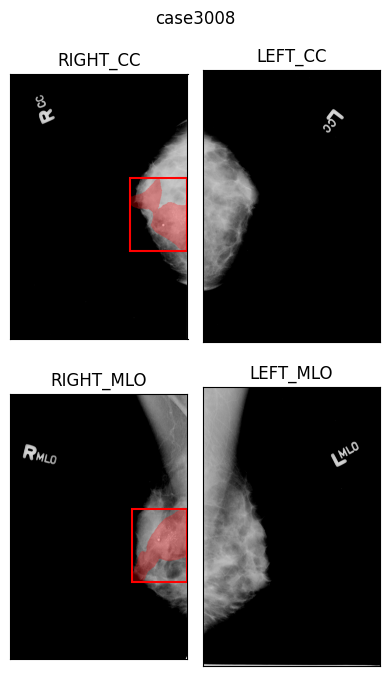

In [ ]:
import random
sample_case = random.choice(ddsm_ds.cases)
ddsm_ds.show_case(sample_case)

# Analisis del tamaño de las imagenes

In [2]:
import pathlib
ddsm_png = "/home/alalbiol/Data/mamo/DDSM_png/"

all_png_files = list(pathlib.Path(ddsm_png).glob('**/*.png'))
print("number of png files", len(all_png_files))


number of png files 10420


In [13]:
max_h = 2100
max_w = 1700

new_sizes = []
from PIL import Image
from tqdm import tqdm


import numpy as np
for png_file in tqdm(all_png_files):
    if png_file.name[0] == '.':
        continue
    im = Image.open(png_file)
    w, h = im.size
    
    scale_h = max_h / h
    scale_w = max_w / w
    
    scale = min(scale_h, scale_w)
    
    new_w = int(w * scale)
    new_h = int(h * scale)
    
    new_sizes.append(np.array([new_w, new_h]))
    
    
        
    
    

100%|██████████| 10420/10420 [00:01<00:00, 6896.53it/s]


In [16]:
new_sizes = np.array(new_sizes)

print(new_sizes.max(axis=0))
print(new_sizes.min(axis=0))

[1700 2100]
[ 565 1885]
